In [42]:
# Importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [44]:
# Cargar Dataset
df = pd.read_csv('Ventas (1).csv')
df.head()

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
0,2022-01-01,6,0,0,4033
1,2022-01-02,7,0,1,4012
2,2022-01-03,1,0,0,1608
3,2022-01-04,2,1,0,2046
4,2022-01-05,3,0,0,2484


In [46]:
# Comprobar si ahy valores faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Fecha          365 non-null    object
 1   DíaDeLaSemana  365 non-null    int64 
 2   Promociones    365 non-null    int64 
 3   Festivo        365 non-null    int64 
 4   Ventas         365 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 14.4+ KB


In [48]:
# Convertir la columna 'Fecha' a tipo Datatime
df['Fecha'] = pd.to_datetime(df['Fecha'])
df.head()

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
0,2022-01-01,6,0,0,4033
1,2022-01-02,7,0,1,4012
2,2022-01-03,1,0,0,1608
3,2022-01-04,2,1,0,2046
4,2022-01-05,3,0,0,2484


In [50]:
escala = MinMaxScaler(feature_range=(0,1))
# Eliminamos las columnas no deseadas y guardamo los nombres de las columnas que vamos a escalar
columnas_para_escalar = df.drop(['Ventas','Fecha'], axis = 1).columns

# Ajustamos el MinMaxScaler a las columnas restantes y transformamos los datos
normado = escala.fit_transform(df[columnas_para_escalar])

# Creamos un nuevo dataframe con los datos normalizados y las columnas correctas
df_normado = pd.DataFrame(data = normado, columns = columnas_para_escalar)

# Si necesitas, podes agregar las columnas no escaladas que has quitado previamente
df_normado['Ventas'] = df['Ventas']
df_normado['Fecha'] = df['Fecha']

# Ahora el df_normado tiene los datos normalizados y las columnas no normalizadas originales
df_normado.head()

,DíaDeLaSemana,Promociones,Festivo,Ventas,Fecha
0,0.833333,0.0,0.0,4033,2022-01-01
1,1.000000,0.0,1.0,4012,2022-01-02
2,0.000000,0.0,0.0,1608,2022-01-03
3,0.166667,1.0,0.0,2046,2022-01-04
4,0.333333,0.0,0.0,2484,2022-01-05


In [52]:
# Comprobacion del tipo de datos Fecha
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Fecha          365 non-null    datetime64[ns]
 1   DíaDeLaSemana  365 non-null    int64         
 2   Promociones    365 non-null    int64         
 3   Festivo        365 non-null    int64         
 4   Ventas         365 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 14.4 KB


In [60]:
# Identificar las variables dependiendes e independientes
X = df_normado.drop(['Ventas','Fecha'], axis = 1)
y = df['Ventas']

In [62]:
# Dividir en conjuntos de entrenamiento y prueba
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X, y, train_size=0.8, random_state = 42)

## Análisis Exploratorio de Datos (EDA)

In [64]:
# Estadisticas descriptivas
df.describe()

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
count,365,365.000000,365.000000,365.000000,365.000000
mean,2022-07-01 23:59:59.999999744,4.005479,0.200000,0.142466,2997.219178
min,2022-01-01 00:00:00,1.000000,0.000000,0.000000,1305.000000
25%,2022-04-02 00:00:00,2.000000,0.000000,0.000000,2195.000000
50%,2022-07-02 00:00:00,4.000000,0.000000,0.000000,3074.000000
75%,2022-10-01 00:00:00,6.000000,0.000000,0.000000,3979.000000
max,2022-12-31 00:00:00,7.000000,1.000000,1.000000,4404.000000
std,NaN,2.002738,0.400549,0.350007,942.096284


Text(0, 0.5, 'Frecuencia')

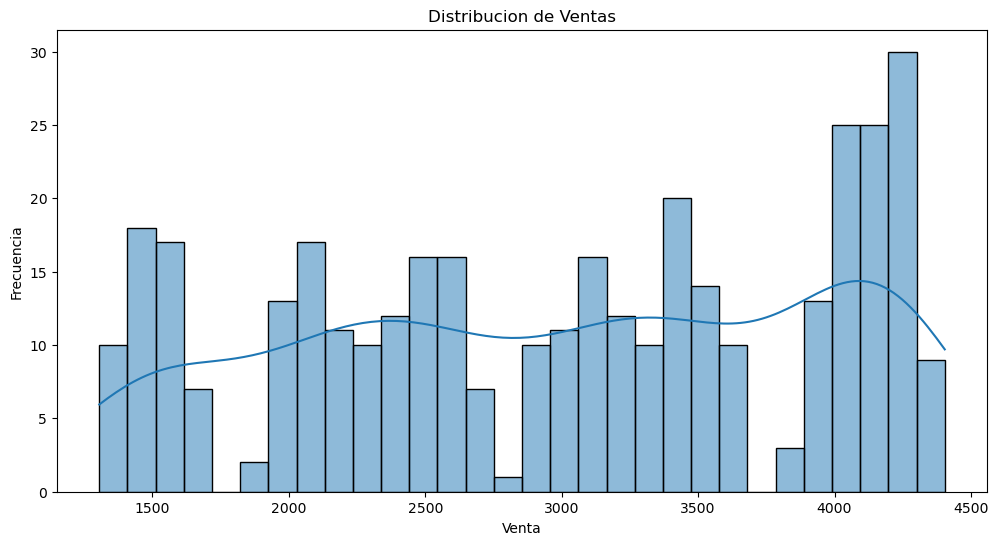

In [68]:
# Visualización de la distribución de ventas
plt.figure(figsize=(12,6))
sns.histplot(df['Ventas'], bins = 30, kde = True)
plt.title('Distribucion de Ventas')
plt.xlabel('Venta')
plt.ylabel('Frecuencia')

In [74]:
# Relación entre ventas y dias de la semana por promedio de ventas
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='DiaDeLaSemana', y='Ventas')
plt.title('Ventas promedio por dias de la semana')
plt.xlabel('Dia de la semana')
plt.ylabel('Venta promedio')

ValueError: Could not interpret value `DiaDeLaSemana` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>